First five rows of the dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Coefficients:
[998.57768914]

Mean Squared Error: 4061.83
Coefficient of Determination (R^2): 0.23

The Prediction is not precise


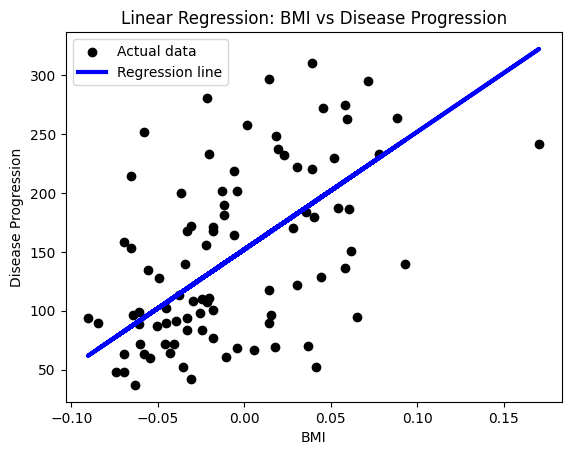

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Load the diabetes dataset module from the sklearn-library
diabetes = datasets.load_diabetes()

#Converting the diabetes object into a 2-D NumpyArray.
#You can also convert it into a Panda Dataframe.
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target  # Creating a 1-Dimensional Array/ Pandas Series as a new feature, which will be the target variable in the corresponding dataframe 'df'


print("First five rows of the dataset:")
print(df.head())


# For simplicity, we'll use only one feature: 'bmi' (Body Mass Index)
X = df[['bmi']].values  
y = df['target'].values  

#'X' is the independent variable which is loaded with only feature, i.e 'BMI'.(Generally, it is a 2-Dimensional Array)
#'y' is the dependent variable which is loaded with only feature, i.e 'target', and it should essentially be a Pandas Series or a 1-Dimensional Array.

# Also, converting the variables into Numpy-Arrays for providing input for the Linear-Regression Algo.

# 4. Split the Data into Training and Testing Sets with a 80-20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Now, initializing the model
regr = linear_model.LinearRegression()

# Traininng the model using the training sets and making the model top learn the relationship between X_train and y_train
regr.fit(X_train, y_train)

# 6. Making Predictions
y_pred = regr.predict(X_test)

# 7. Evaluate and calculating the model efficiency and accuracy
# The coefficients
print("\nCoefficients:")
print(regr.coef_)

# The mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print(f"Coefficient of Determination (R^2): {r2:.2f}")

print("")

if(r2 == 1):
    print("The Prediction is Perfect")
else:
    print("The Prediction is not precise")

# 8. Visualizing the Results using matplotlib
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Linear Regression: BMI vs Disease Progression')
plt.legend()
plt.show()
